In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [23]:
!pip install statsmodels

In [4]:
# Ganti path file CSV dengan path yang sesuai
data = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\SESI-3\Motor+Vehicle+Thefts+CSV\CAKAP_5\actual.csv")
data.head(30)

,date_stolen,total_kendaraan_dicuri
0,2021-10-07,16
1,2021-10-08,27
2,2021-10-09,13
3,2021-10-10,12
4,2021-10-11,19
5,2021-10-12,27
6,2021-10-13,15
7,2021-10-14,21
8,2021-10-15,14
9,2021-10-16,18


In [6]:
data.rename(columns={'date_stolen': 'Date'}, inplace=True)


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date
data.set_index(data['Date'], inplace=True)
data.drop('Date', axis=1, inplace=True)
data.head()


,total_kendaraan_dicuri
Date,
2021-10-07,16
2021-10-08,27
2021-10-09,13
2021-10-10,12
2021-10-11,19


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 2021-10-07 to 2022-04-06
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   total_kendaraan_dicuri  182 non-null    int64
dtypes: int64(1)
memory usage: 2.8+ KB


<Axes: xlabel='Date'>

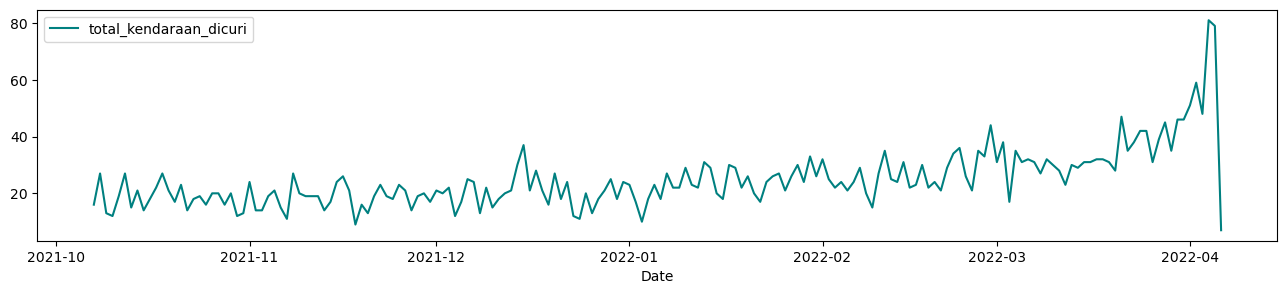

In [10]:
data.plot(y='total_kendaraan_dicuri', color='teal', figsize=(16,3))

C:\Users\DIKY\AppData\Local\Temp\ipykernel_1684\3883496408.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_monthly_avg = data.resample('M').mean()


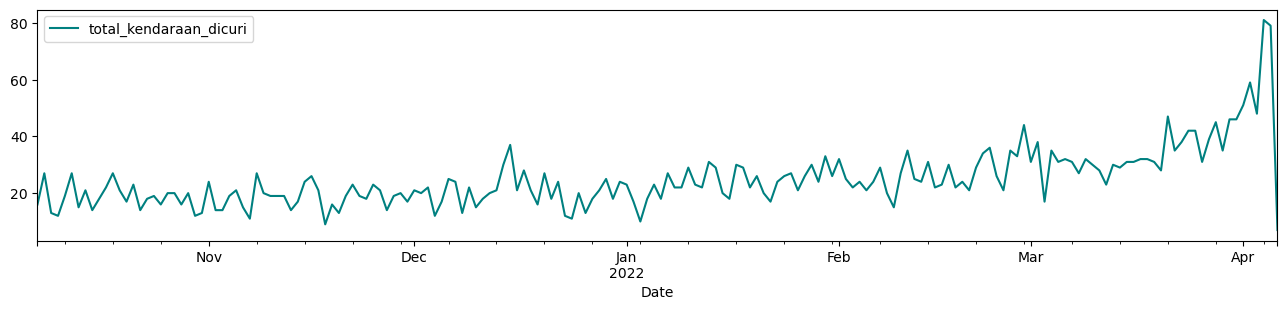

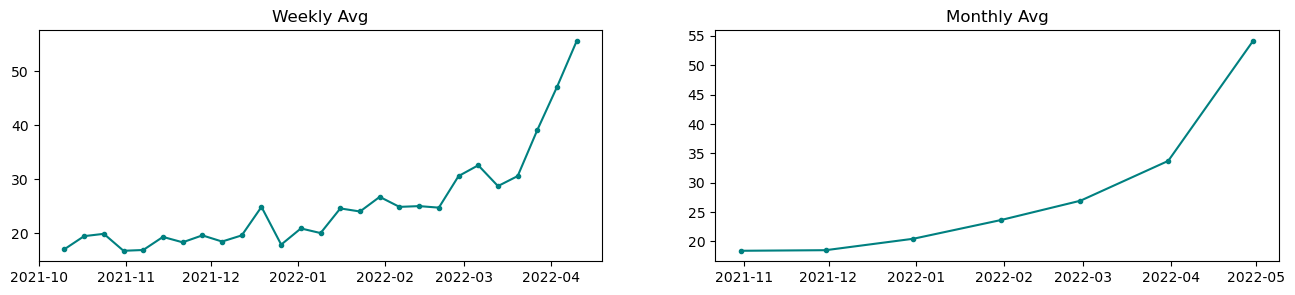

In [12]:
# Assuming 'Date' is the name of your index column
data.index = pd.to_datetime(data.index)

data.plot(y='total_kendaraan_dicuri', color='teal', figsize=(16,3))

price_weekly_avg = data.resample('W').mean()
price_monthly_avg = data.resample('M').mean()
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.title('Weekly Avg')
plt.plot(price_weekly_avg.total_kendaraan_dicuri, "-o", markersize=3, color='teal')
plt.subplot(122)
plt.title('Monthly Avg')
plt.plot(price_monthly_avg.total_kendaraan_dicuri, "-o", markersize=3, color='teal')

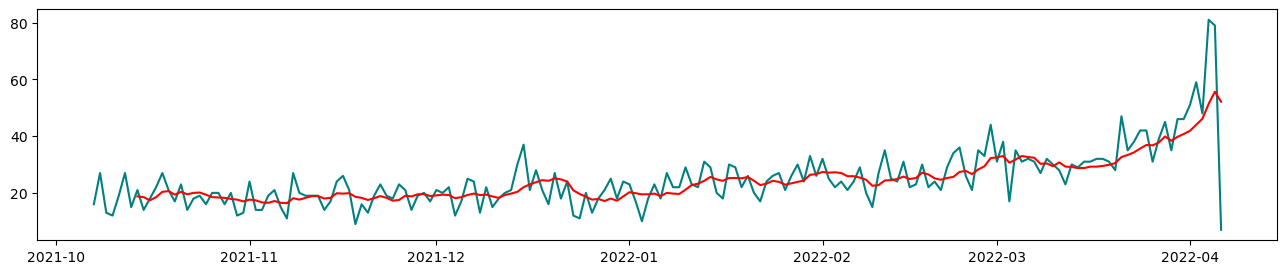

In [17]:
rolling_mean = data.total_kendaraan_dicuri.rolling(window=8, center=False).mean() #window of 7 (weekly avg) captures our data better 
plt.figure(figsize=(16,3))
plt.plot(data.total_kendaraan_dicuri, color='teal')
plt.plot(rolling_mean, 'red') 

Text(0, 0.5, 'Autocorrelation')

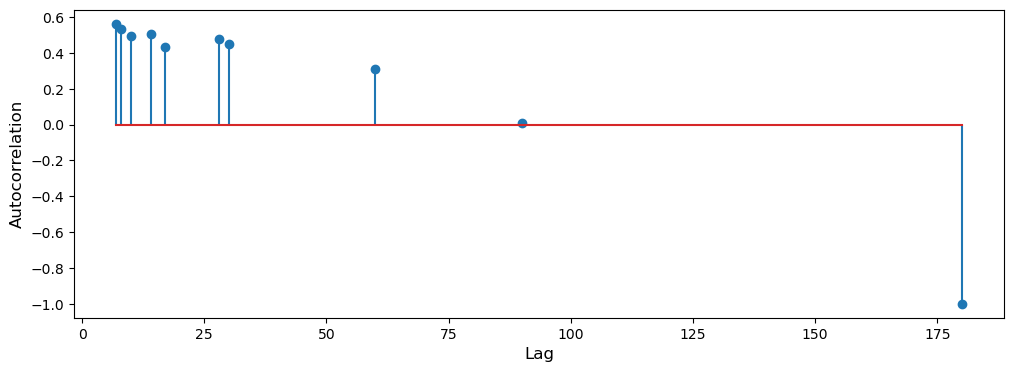

In [18]:
lags = [7, 8, 10, 14, 17, 28, 30, 60, 90, 180] 
autocorrs = [data.total_kendaraan_dicuri.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

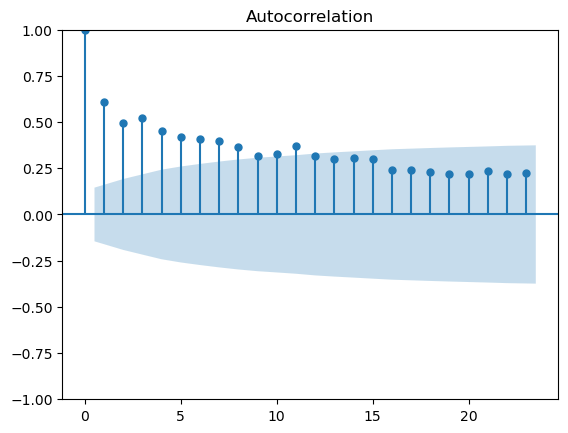

In [22]:
plot_acf(data)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

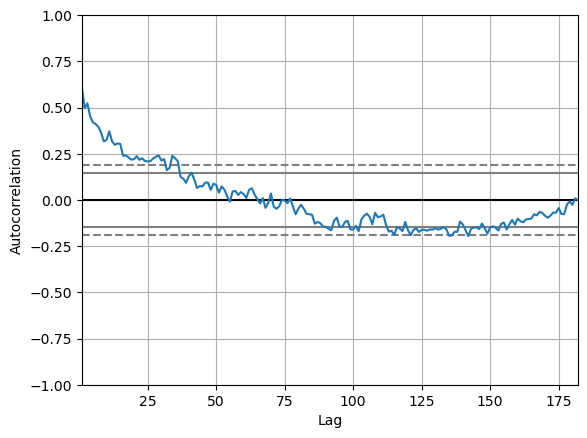

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data) 


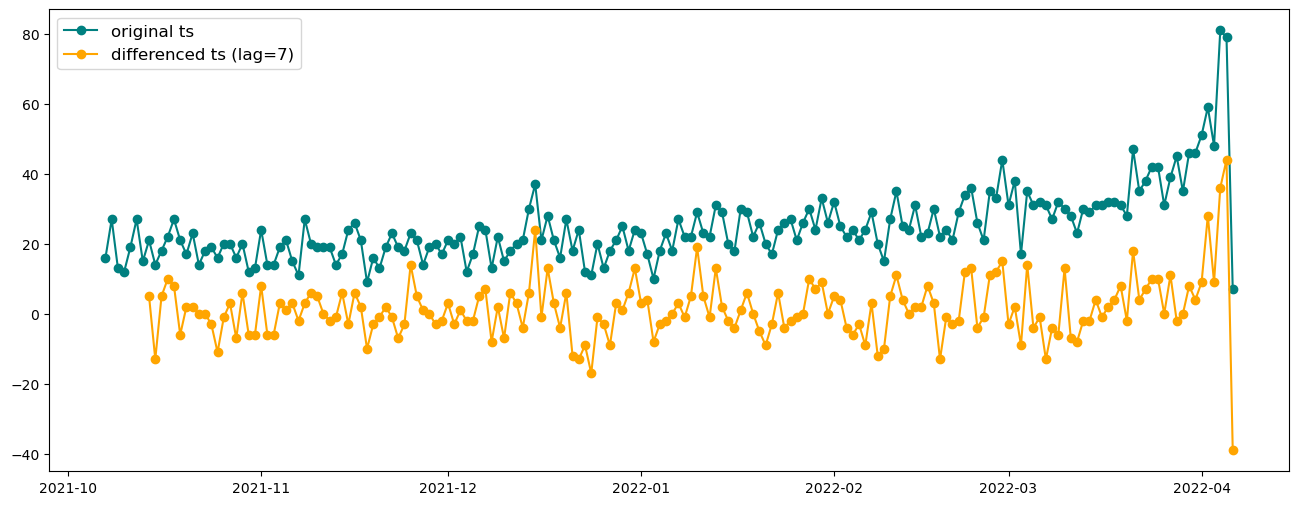

In [28]:
plt.figure(figsize=(16, 6))
plt.plot(data.total_kendaraan_dicuri, '-o', color='teal', label="original ts")
plt.plot(data.total_kendaraan_dicuri.diff(7), '-o', color='orange', label="differenced ts (lag=7)")
plt.legend(fontsize=12)

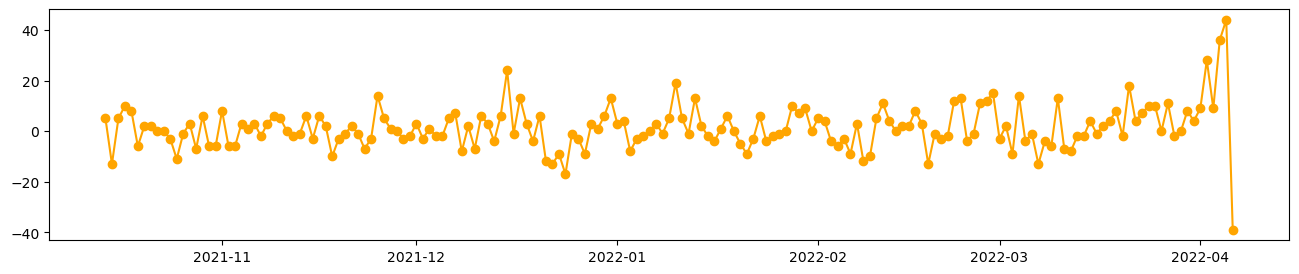

In [33]:
dicuri = data.total_kendaraan_dicuri
dicuri_diff = dicuri.diff(7).dropna() 

plt.figure(figsize=(16,3))
plt.plot(dicuri_diff, "-o", color='orange')

In [34]:
time_series = dicuri_diff 

In [54]:
def organize_data(to_forecast, window, horizon=1):
    to_forecast = to_forecast.values  # Convert to NumPy array
    shape = to_forecast.shape[:-1] + (to_forecast.shape[-1] - window + 1, window)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast,
                                        shape=shape,
                                        strides=strides)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
    return X[:-horizon], y

lag = 80
X, y = organize_data(time_series, lag)

MAE = 3.687
MAE2 = 3.687


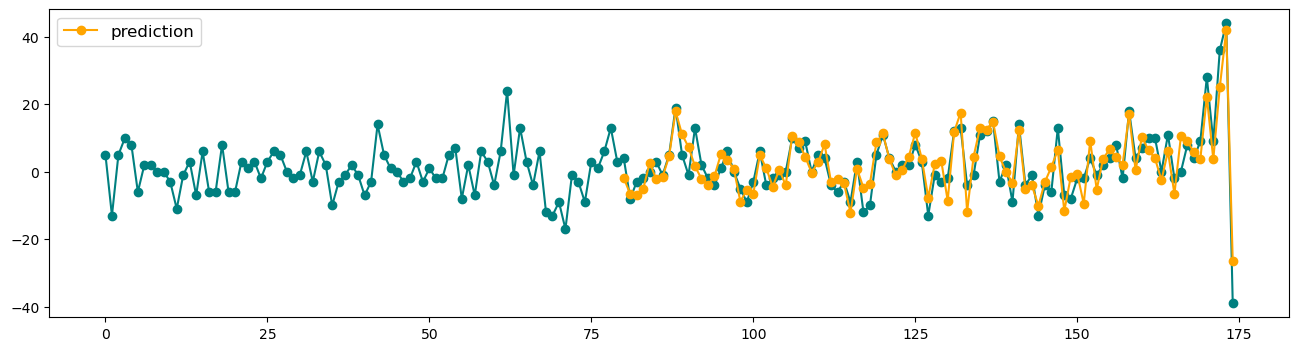

In [55]:
lr = LinearRegression()
lr_fit = lr.fit(X, y)
lr_prediction = lr_fit.predict(X)

plt.figure(figsize=(16, 4))
plt.plot(time_series.values, '-o', color='teal')
plt.plot(np.arange(lag, len(time_series)), lr_prediction, '-o', label='prediction', color='orange')
plt.legend(fontsize=12)

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], lr_prediction)))

# Adjust the indexing to cover the same time period
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-len(lr_prediction):], lr_prediction)))

In [64]:
ar = AutoReg(time_series, lags=20)
ar_fit = ar.fit()
optlag = len(ar_fit.params) - 1
print("Best optimal lag for AR model: {}".format(optlag))

Best optimal lag for AR model: 20


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE = 3.687
MAE2 = 3.687


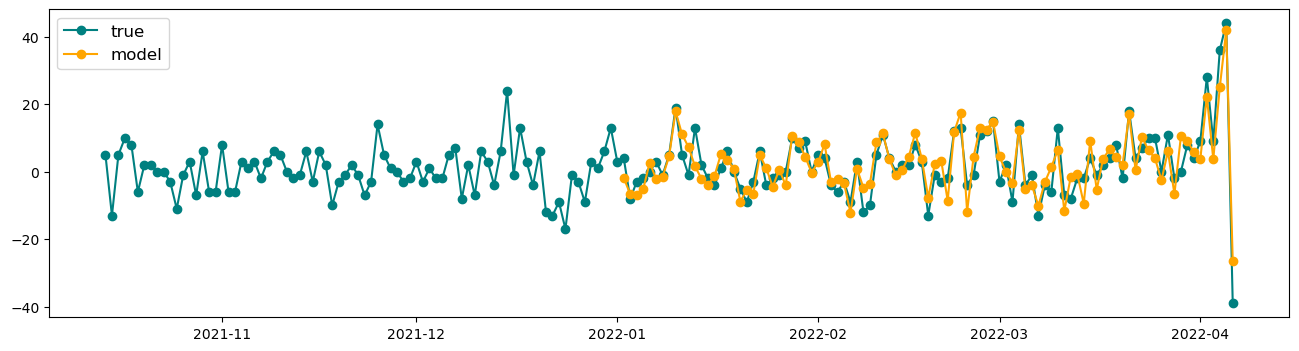

In [67]:
from statsmodels.tsa.ar_model import AutoReg

lag = 80
ar = AutoReg(time_series, lags=lag, old_names=False)
ar_fit = ar.fit()
ar_prediction = ar_fit.predict(start=lag)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(ar_prediction, '-o', label='model', color='orange')
plt.legend(fontsize=12)

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[lag:], ar_prediction)))

# Adjust the indexing to cover the same time period
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-len(ar_prediction):], ar_prediction)))


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE = 5.965
MAE2 = 5.965


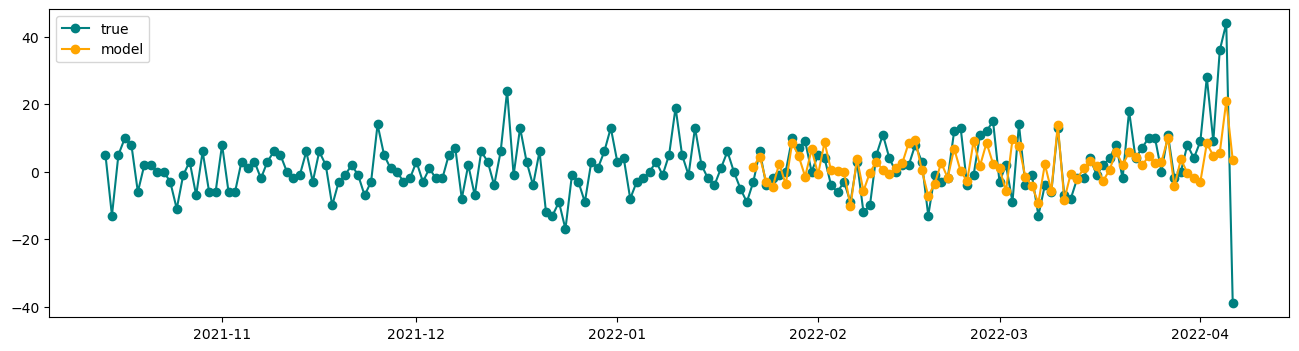

In [69]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(time_series, order=(7, 0, 7))  # (p, d, q) where p is the order of AR, d is the degree of differencing, and q is the order of MA
arma_fit = arma.fit()
start = 100
arma_prediction = arma_fit.predict(start=start)

plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label='true', color='teal')
plt.plot(arma_prediction, '-o', label='model', color='orange')
plt.legend()

print('MAE = {0:.3f}'.format(mean_absolute_error(time_series[start:], arma_prediction)))

# Adjust the indexing to cover the same time period
print('MAE2 = {0:.3f}'.format(mean_absolute_error(time_series[-len(arma_prediction):], arma_prediction)))


In [72]:
from statsmodels.tsa.ar_model import AutoReg

lag = 80
ar = AutoReg(time_series, lags=lag)
ar_fit = ar.fit()
ar_forecast = ar_fit.predict(start=len(time_series), end=len(time_series) + 6)
ar_forecast


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2022-04-07    12.516342
2022-04-08   -23.796700
2022-04-09   -52.330914
2022-04-10    11.453913
2022-04-11   -48.143275
2022-04-12   -48.799604
2022-04-13    84.116746
Freq: D, dtype: float64

In [74]:
from statsmodels.tsa.arima.model import ARIMA

order = (7, 0, 7)  # (p, d, q) where p is the order of AR, d is the degree of differencing, and q is the order of MA
arma = ARIMA(time_series, order=order)
arma_fit = arma.fit()
arma_forecast = arma_fit.predict(start=len(time_series), end=len(time_series) + 6)
arma_forecast


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-04-07     5.715642
2022-04-08    14.046778
2022-04-09   -25.201269
2022-04-10    -0.174898
2022-04-11   -17.793575
2022-04-12   -30.171876
2022-04-13    38.460196
Freq: D, Name: predicted_mean, dtype: float64

In [76]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(7, 0, 7))
arima_fit = model.fit()
arima_forecast = arima_fit.forecast(steps=7)
arima_forecast


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2022-04-07     5.715642
2022-04-08    14.046778
2022-04-09   -25.201269
2022-04-10    -0.174898
2022-04-11   -17.793575
2022-04-12   -30.171876
2022-04-13    38.460196
Freq: D, Name: predicted_mean, dtype: float64

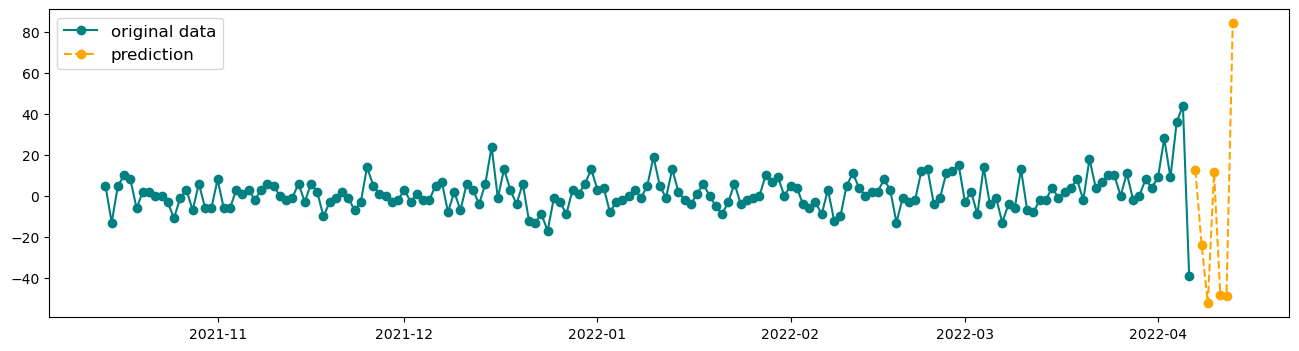

In [77]:
#AR model's 7 out of sample predictions
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(ar_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)

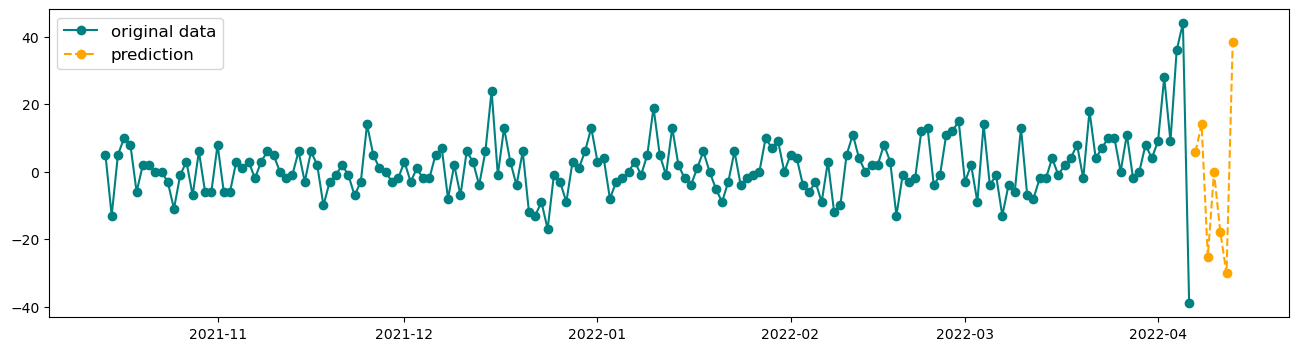

In [79]:
#ARMA model's 7 out sample predicitons 
plt.figure(figsize=(16, 4))
plt.plot(time_series, '-o', label="original data", color='teal')
plt.plot(arma_forecast, '--o', label='prediction', color='orange')
plt.legend(fontsize=12)

In [81]:
idx = ar_forecast.index.values

forecast_prices = []
lag = 7
for i, diff in enumerate(ar_forecast): #choosing AR as it produced lower MAE than ARMA model
    prev_value = dicuri[-(lag)+i:][0]
    forecast_prices.append(prev_value+diff)
    
bitcoin_forecast = pd.Series(forecast_prices, index=idx)
bitcoin_forecast

C:\Users\DIKY\AppData\Local\Temp\ipykernel_1684\3007576632.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_value = dicuri[-(lag)+i:][0]


2022-04-07    58.516342
2022-04-08    27.203300
2022-04-09     6.669086
2022-04-10    59.453913
2022-04-11    32.856725
2022-04-12    30.200396
2022-04-13    91.116746
dtype: float64

In [84]:

combined_series = pd.concat([data['total_kendaraan_dicuri'], bitcoin_forecast])

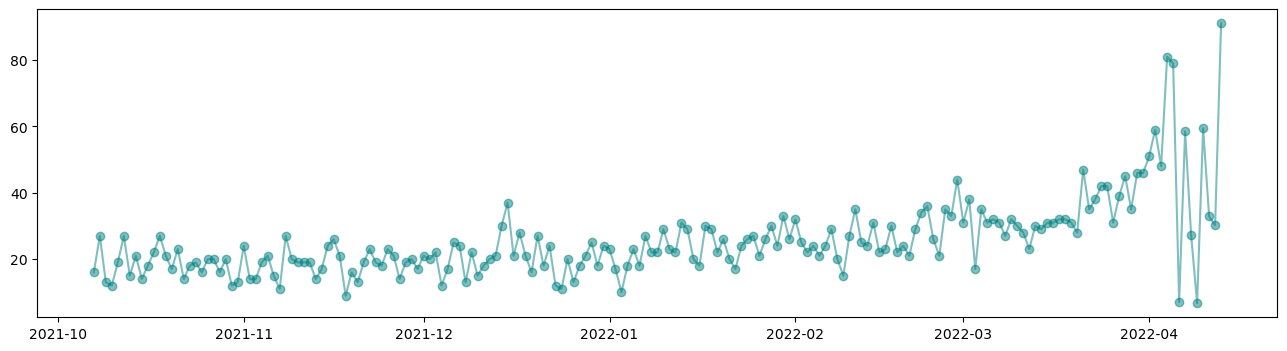

In [88]:
hist_values = pd.concat([data['total_kendaraan_dicuri'], bitcoin_forecast])

plt.figure(figsize=(16,4))
plt.plot(hist_values, '-o', color='teal', alpha=0.5)
plt.show()


In [97]:
real_price = pd.DataFrame(data={"total_kendaraan_dicuri":[8556.61, 8070.8, 8891.21, 8516.24, 9477.84, 10016.49, 10178.71],
                                 "date_stolen":['2022-04-08', '2022-04-09', '2022-04-07', '2021-09-11', '2022-04-12', '2022-04-13', '2022-04-14']})
real_price.set_index(pd.to_datetime(real_price['date_stolen']), inplace=True)
real_price.drop('date_stolen', axis=1, inplace=True)
real_price

,total_kendaraan_dicuri
date_stolen,
2022-04-08,8556.61
2022-04-09,8070.80
2022-04-07,8891.21
2021-09-11,8516.24
2022-04-12,9477.84
2022-04-13,10016.49
2022-04-14,10178.71


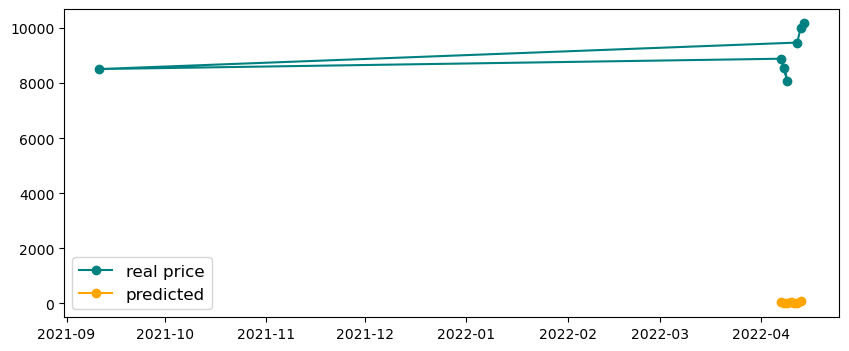

In [98]:
plt.figure(figsize=(10,4))
plt.plot(real_price, "-o", color="teal", label="real price")
plt.plot(bitcoin_forecast, "-o", color="orange", label="predicted")
plt.legend(fontsize=12)
plt.show()

In [104]:
import pandas as pd

data = {
    'date_stolen': ['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
                    '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
                    '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27',
                    '2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
                    '2021-11-04', '2021-11-05'],
    'total_kendaraan_dicuri': [16, 27, 13, 12, 19, 27, 15, 21, 14, 18, 22, 27, 21, 17, 23, 14, 18, 19, 16, 20, 20, 16, 20,
                                12, 13, 24, 14, 14, 19, 21]
}

real_price = pd.DataFrame(data)

# Convert 'date_stolen' column to datetime
real_price['date_stolen'] = pd.to_datetime(real_price['date_stolen'])

# Set 'date_stolen' column as the index
real_price.set_index('date_stolen', inplace=True)

# Drop the 'total_kendaraan_dicuri' column
real_price.drop('total_kendaraan_dicuri', axis=1, inplace=True)

real_price


""
date_stolen
2021-10-07
2021-10-08
2021-10-09
2021-10-10
2021-10-11
2021-10-12
2021-10-13
2021-10-14
2021-10-15


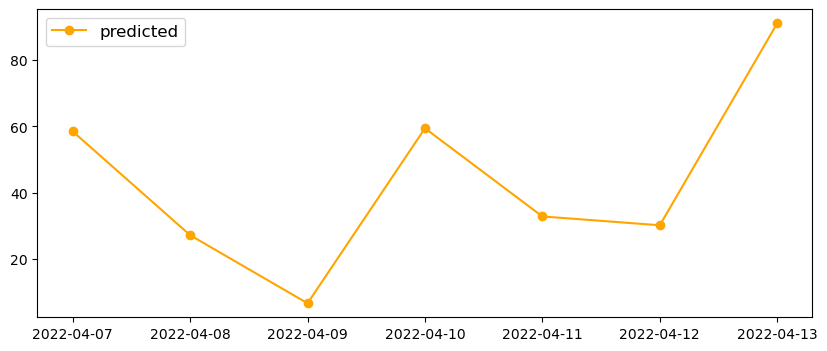

In [105]:
plt.figure(figsize=(10,4))
plt.plot(real_price, "-o", color="teal", label="real price")
plt.plot(bitcoin_forecast, "-o", color="orange", label="predicted")
plt.legend(fontsize=12)
plt.show()